# Advanced Convolutional Neural Networks (CNN)

## CNN for Sentence Classification
- It is widely known that CNNs are good for snapshot-like data, like images
- However, CNNs are effectve for NLP tasks as well
- For more information, refer to:
    - Kim 2014 (http://emnlp2014.org/papers/pdf/EMNLP2014181.pdf)
    - Zhang et al 2015 (https://papers.nips.cc/paper/5782-character-level-convolutional-networks-for-text-classification.pdf)
    
<br>
- In this section, we perform sentence classification with CNNs (Kim 2014)
</br>
<img src="http://d3kbpzbmcynnmx.cloudfront.net/wp-content/uploads/2015/11/Screen-Shot-2015-11-06-at-8.03.47-AM.png" style="width: 800px"/>

<br>
- Pixels are made of embedding vectors of each word in a sentence
- Convolutions are performed based on word-level
- Classify each sentence as positive (1) or negative (0)

<img src="http://d3kbpzbmcynnmx.cloudfront.net/wp-content/uploads/2015/11/Screen-Shot-2015-11-06-at-12.05.40-PM.png" style="width: 600px"/>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


## Load Dataset
- IMDb Movie reviews sentiment classification Dataset
- Parameter description
    - num_features: number of words to account for (i.e., only frequent n words are considered)
    - sequence_length: maximum number of words for a sentence (if sentence is too short, pad by zeros)
    - embedding_dimension: dimensionality of embedding space (i.e., dimensionality of vector representation for each word)

In [2]:
num_features = 3000
sequence_length = 300
embedding_dimension = 100

In [4]:
(X_train, y_train), (X_test, y_test) = \
imdb.load_data(num_words = num_features)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [9]:
len(X_train[2])

141

In [10]:
max_tot = 0
ll = []
for i in X_train:
    ll.append(len(i))
    max_tot = max(max(i),max_tot)
print(max(ll),max_tot)

2494 2999


In [11]:
X_train = pad_sequences(X_train, maxlen = sequence_length)
X_test = pad_sequences(X_test, maxlen = sequence_length)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25000, 300)
(25000, 300)
(25000,)
(25000,)


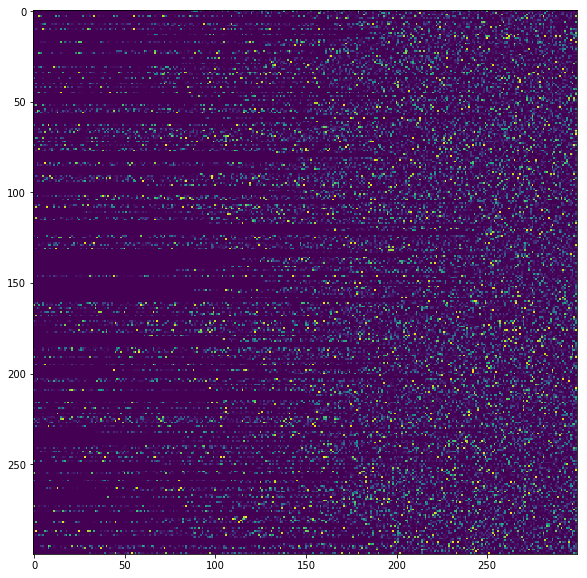

In [13]:
fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(X_train[:300,:300])

## model - 0: Basic CNN sentence classificationmodel
- Basic CNN using 1D convolution and pooling
- Known as "temporal convolution"

$$A_{300 \times 3000}$$
$$A_{300 \times 3000}E_{3000 \times 2}$$

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, MaxPooling1D, Embedding, Flatten
from keras import optimizers

In [10]:
def imdb_cnn():
    model = Sequential()
    
    # use Embedding layer to create vector representation of each word => it is fine-tuned every iteration
    model.add(Embedding(input_dim = 3000, output_dim = embedding_dimension, input_length = sequence_length))
    model.add(Conv1D(filters = 50, kernel_size = 5, strides = 1, padding = 'valid'))
    model.add(MaxPooling1D(2, padding = 'valid'))
    
    model.add(Flatten())
    
    model.add(Dense(10))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    adam = optimizers.Adam(lr = 0.001)
    
    model.compile(loss='binary_crossentropy', optimizer=adam , metrics=['accuracy'])
    
    return model

In [11]:
model = imdb_cnn()

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 100)          300000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 296, 50)           25050     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 148, 50)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7400)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                74010     
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
__________

In [18]:
history = model.fit(X_train, y_train, batch_size = 50, epochs = 5, validation_split = 0.2, verbose = 0)

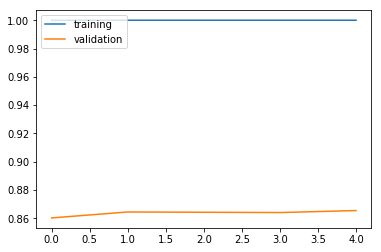

In [19]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [20]:
results = model.evaluate(X_test, y_test)

25000/25000 [==============================] - 11s 434us/step


In [21]:
print('Test accuracy: ', results[1])

Test accuracy:  0.86852


##  model - 2: Advanced CNN sentence classification
- Advanced CNN using 2D convolution and pooling
    - Embedding layer is "reshaped" to 4D to fit into 2D convolutional layer
- Perform global max pooling for each window

In [24]:
from keras.layers import Reshape, Conv2D, GlobalMaxPooling2D

In [25]:
def imdb_cnn_2():
    model = Sequential()

    model.add(Embedding(input_dim = 3000, output_dim = embedding_dimension, input_length = sequence_length))
    model.add(Reshape((sequence_length, embedding_dimension, 1), input_shape = (sequence_length, embedding_dimension)))
    model.add(Conv2D(filters = 50, kernel_size = (5, embedding_dimension), strides = (1,1), padding = 'valid'))
    model.add(GlobalMaxPooling2D())

    model.add(Dense(10))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(10))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    adam = optimizers.Adam(lr = 0.001)

    model.compile(loss='binary_crossentropy', optimizer=adam , metrics=['accuracy'])
    
    return model

In [26]:
model = imdb_cnn_2()

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 300, 100)          300000    
_________________________________________________________________
reshape_1 (Reshape)          (None, 300, 100, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 296, 1, 50)        25050     
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
__________

In [29]:
history = model.fit(X_train, y_train, batch_size = 50, epochs = 5, validation_split = 0.2, verbose = 0)

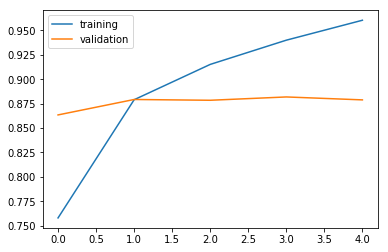

In [30]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [31]:
results = model.evaluate(X_test, y_test)

25000/25000 [==============================] - 11s 453us/step


In [32]:
print('Test accuracy: ', results[1])

Test accuracy:  0.8726


##  model - 3: Advanced CNN sentence classification
- Structure more similar to that proposed in **Kim 2014**
    - Three convoltion operations with different filter sizes are performed and their results are merged

In [41]:
from keras.models import Model
from keras.layers import concatenate, Input, MaxPooling2D

In [42]:
filter_sizes = [3, 4, 5]

In [43]:
def convolution():
    inn = Input(shape = (sequence_length, embedding_dimension, 1))
    convolutions = []
    # we conduct three convolutions & poolings then concatenate them.
    for fs in filter_sizes:
        conv = Conv2D(filters = 100, kernel_size = (fs, embedding_dimension), strides = 1, padding = "valid")(inn)
        nonlinearity = Activation('relu')(conv)
        maxpool = MaxPooling2D(pool_size = (sequence_length - fs + 1, 1), padding = "valid")(nonlinearity)
        convolutions.append(maxpool)
        
    outt = concatenate(convolutions)
    model = Model(inputs = inn, outputs = outt)
        
    return model

In [44]:
def imdb_cnn_3():
    
    model = Sequential()
    model.add(Embedding(input_dim = 3000, output_dim = embedding_dimension, input_length = sequence_length))
    model.add(Reshape((sequence_length, embedding_dimension, 1), input_shape = (sequence_length, embedding_dimension)))
    
    # call convolution method defined above
    model.add(convolution())
    
    model.add(Flatten())
    model.add(Dense(10))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(10))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    adam = optimizers.Adam(lr = 0.001)

    model.compile(loss='binary_crossentropy', optimizer=adam , metrics=['accuracy'])
    
    return model

In [45]:
model = imdb_cnn_3()

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 300, 100)          300000    
_________________________________________________________________
reshape_4 (Reshape)          (None, 300, 100, 1)       0         
_________________________________________________________________
model_1 (Model)              (None, 1, 1, 300)         120300    
_________________________________________________________________
flatten_2 (Flatten)          (None, 300)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                3010      
_________________________________________________________________
activation_10 (Activation)   (None, 10)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
__________

In [47]:
convolution().summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 300, 100, 1)  0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 298, 1, 100)  30100       input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 297, 1, 100)  40100       input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 296, 1, 100)  50100       input_3[0][0]                    
__________________________________________________________________________________________________
activation

In [49]:
history = model.fit(X_train, y_train, batch_size = 50, epochs = 5, validation_split = 0.2, verbose = 0)

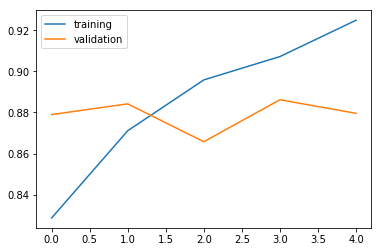

In [50]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [51]:
results = model.evaluate(X_test, y_test)

25000/25000 [==============================] - 40s 2ms/step


In [52]:
print('Test accuracy: ', results[1])

Test accuracy:  0.87904


## model - 4: Advanced CNN sentence classification
- Structure more similar to that proposed in **Kim 2014**
- More techniques are applied to generate more stable results

In [53]:
from keras.layers import BatchNormalization

In [54]:
filter_sizes = [3, 4, 5]

In [55]:
def convolution():
    inn = Input(shape = (sequence_length, embedding_dimension, 1))
    convolutions = []
    # we conduct three convolutions & poolings then concatenate them.
    for fs in filter_sizes:
        conv = Conv2D(filters = 100, kernel_size = (fs, embedding_dimension), strides = 1, padding = "valid")(inn)
        nonlinearity = Activation('relu')(conv)
        maxpool = MaxPooling2D(pool_size = (sequence_length - fs + 1, 1), padding = "valid")(nonlinearity)
        convolutions.append(maxpool)
        
    outt = concatenate(convolutions)
    model = Model(inputs = inn, outputs = outt)
        
    return model

In [56]:
def imdb_cnn_4():
    
    model = Sequential()
    model.add(Embedding(input_dim = 3000, output_dim = embedding_dimension, input_length = sequence_length))
    model.add(Reshape((sequence_length, embedding_dimension, 1), input_shape = (sequence_length, embedding_dimension)))
    model.add(Dropout(0.5))
    # call convolution method defined above
    model.add(convolution())
    
    model.add(Flatten())
    model.add(Dense(10))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    adam = optimizers.Adam(lr = 0.001)

    model.compile(loss='binary_crossentropy', optimizer=adam , metrics=['accuracy'])
    
    return model

In [57]:
model = imdb_cnn_4()

In [58]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 300, 100)          300000    
_________________________________________________________________
reshape_5 (Reshape)          (None, 300, 100, 1)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 300, 100, 1)       0         
_________________________________________________________________
model_3 (Model)              (None, 1, 1, 300)         120300    
_________________________________________________________________
flatten_3 (Flatten)          (None, 300)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                3010      
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
__________

In [60]:
history = model.fit(X_train, y_train, batch_size = 50, epochs = 5, validation_split = 0.2, verbose = 0)

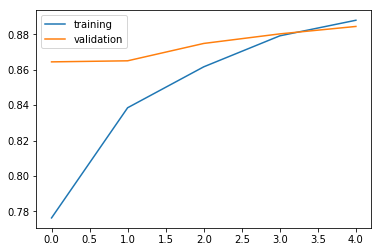

In [61]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [62]:
results = model.evaluate(X_test, y_test)

25000/25000 [==============================] - 36s 1ms/step


In [63]:
print('Test accuracy: ', results[1])

Test accuracy:  0.88412
